**Connect Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library**

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import random
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

**Load Dataset**

In [ ]:
#Sesuaikan path dataset dengan lokasi csv masing masing ya, soalnya tiap device berbeda penyimpanan
train_data = pd.read_csv('/content/train_data_cl_v2.csv')
test_data = pd.read_csv('/content/test_data_cl_v2.csv')
label_test = pd.read_csv('/content/test_data_GroundTruth_cl.csv')

**Perbandingan Data Training dan Data Test**

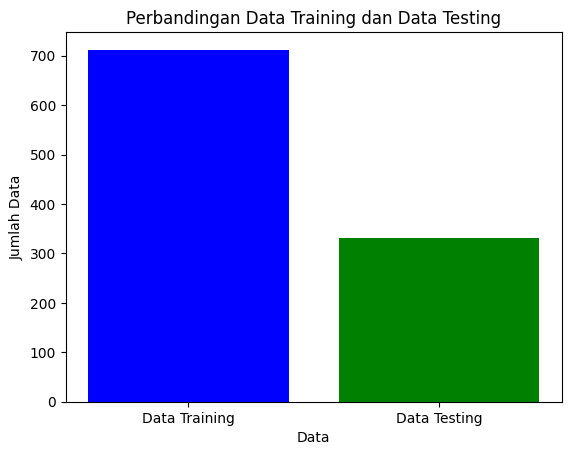

Jumlah Data Training : 712
Jumlah Data Testing : 331


In [ ]:

jml_dtr = len(train_data.index)
jml_dts = len(test_data.index)

def chart_perbandingan(data1, data2, label1, label2, judul):
    # Data preparation
    labels = [label1, label2]

    # Plotting the bar chart
    plt.bar(labels, [data1, data2], color=['blue', 'green'])

    # Adding title and labels
    plt.title(judul)
    plt.xlabel('Data')
    plt.ylabel('Jumlah Data')

    # Showing the chart
    plt.show()

# Contoh penggunaan
data1 = jml_dtr
data2 = jml_dts
label1 = 'Data Training'
label2 = 'Data Testing'
judul = 'Perbandingan Data Training dan Data Testing'

chart_perbandingan(data1, data2, label1, label2, judul)
print('Jumlah Data Training :', jml_dtr)
print('Jumlah Data Testing :', jml_dts)

# Data Preprocessing

**Missing Value Train Data**

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [ ]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train_data = train_data.fillna(train_data.mode().iloc[0])
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Missing Value Test Data**

In [ ]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          244
Embarked         0
dtype: int64

In [ ]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
test_data = test_data.fillna(test_data.mode().iloc[0])
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Feature Selection**

In [ ]:
selected_feature = ['Age','Sex'] #Ini feature yang dipilih, bisa kalian tambahkan atau kalian kurangkan
x_train = train_data[selected_feature]
x_test = test_data[selected_feature]
y_train = train_data['Survived']
y_test = label_test['Survived']

**Label Encoding**

In [ ]:
object_columns_tr = x_train.select_dtypes(include='object').columns.tolist()
object_columns_ts = x_test.select_dtypes(include='object').columns.tolist()

le = LabelEncoder()
for col in object_columns_tr:
  x_train[col] = le.fit_transform(x_train[col])

for col in object_columns_ts:
  x_test[col] = le.fit_transform(test_data[col])

<ipython-input-94-12bd63110c55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = le.fit_transform(x_train[col])
<ipython-input-94-12bd63110c55>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = le.fit_transform(test_data[col])


In [ ]:
x_train.head(10)

,Age,Sex
0,22.0,1
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,1
5,54.0,1
6,2.0,1
7,27.0,0
8,14.0,0
9,4.0,0


In [ ]:
x_train.dtypes

Age    float64
Sex      int64
dtype: object

In [ ]:
x_test.dtypes

Age    float64
Sex      int64
dtype: object

**Scaling Data**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#variabel kosong untuk menyimpan nilai akurasi data latih & data uji
training_accuracies = []
testing_accuracies = []

# Model Perceptron

In [ ]:
activation_func = ['relu','sigmoid','tanh'] #List Activation Function

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

for af in activation_func:
  model = Sequential()
  model.add(Dense(units=1, input_dim=x_train.shape[1], activation = af))

  if 'initial_weights' in locals():
    model.set_weights(initial_weights)
  else:
    initial_weights = model.get_weights()

  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.002), metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=100, verbose=0, validation_split=0.2, callbacks=[early_stopping])

  _, accuracy_train = model.evaluate(x_train, y_train, verbose=0)
  _, accuracy_test = model.evaluate(x_test, y_test, verbose=0)


  training_accuracies.append(accuracy_train)
  testing_accuracies.append(accuracy_test)

  print(f'Activation Function: {af}')
  print(f"Training accuracy: {accuracy_train}")
  print(f"Testing accuracy: {accuracy_test}\n")

Activation Function: relu
Training accuracy: 0.7612359523773193
Testing accuracy: 0.921450138092041

Activation Function: sigmoid
Training accuracy: 0.7794944047927856
Testing accuracy: 1.0

Activation Function: tanh
Training accuracy: 0.7865168452262878
Testing accuracy: 0.9607250690460205



In [ ]:
del initial_weights

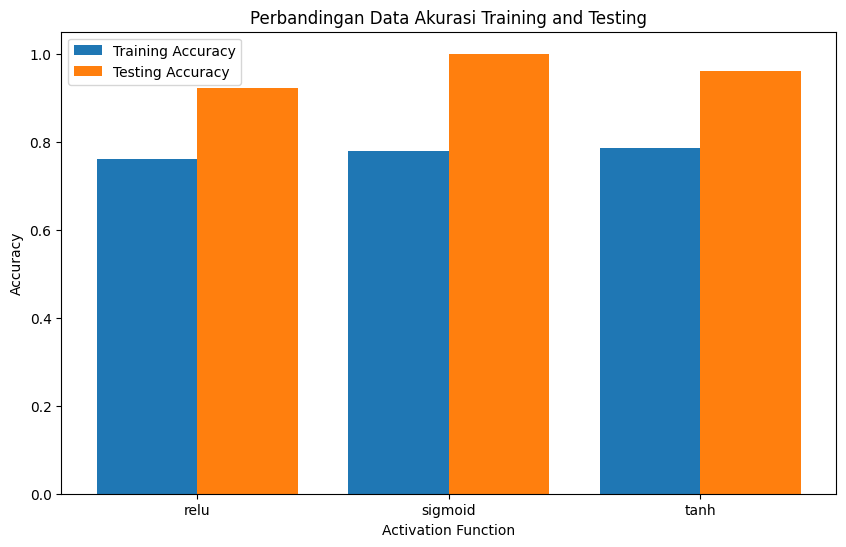

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(np.arange(len(activation_func)) - 0.2, training_accuracies, width=0.4, label='Training Accuracy')
plt.bar(np.arange(len(activation_func)) + 0.2, testing_accuracies, width=0.4, label='Testing Accuracy')

plt.xticks(np.arange(len(activation_func)), activation_func)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Perbandingan Data Akurasi Training and Testing')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.0))
plt.show()